# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt

# Data

In [3]:
# look at the train directories
!ls  train

HEPG2-01  HEPG2-06     HUVEC-03  HUVEC-08  HUVEC-13  RPE-01  RPE-06
HEPG2-02  HEPG2-07     HUVEC-04  HUVEC-09  HUVEC-14  RPE-02  RPE-07
HEPG2-03  history.csv  HUVEC-05  HUVEC-10  HUVEC-15  RPE-03  U2OS-01
HEPG2-04  HUVEC-01     HUVEC-06  HUVEC-11  HUVEC-16  RPE-04  U2OS-02
HEPG2-05  HUVEC-02     HUVEC-07  HUVEC-12  models    RPE-05  U2OS-03


In [4]:
# look at the train directories
!ls  test

HEPG2-08  HEPG2-11  HUVEC-19  HUVEC-22	RPE-08	RPE-11
HEPG2-09  HUVEC-17  HUVEC-20  HUVEC-23	RPE-09	U2OS-04
HEPG2-10  HUVEC-18  HUVEC-21  HUVEC-24	RPE-10	U2OS-05


In [15]:
train_dir = [f.path.split('/')[1] for f in os.scandir('train') if f.is_dir()]
test_dir = [f.path.split('/')[1] for f in os.scandir('test') if f.is_dir()]

In [27]:
train_exp = [d.split('-')[0] for d in train_dir]
test_exp = [d.split('-')[0] for d in test_dir]

In [65]:
train_exp_counter = Counter(train_exp)
test_exp_counter = Counter(test_exp)

In [66]:
# remove model directory in train folder
del train_exp_counter['models']

In [69]:
# show experiment count per cell line
train_exp_counter.most_common()

[('HUVEC', 16), ('RPE', 7), ('HEPG2', 7), ('U2OS', 3)]

In [70]:
# show experiment count per cell line
test_exp_counter.most_common()

[('HUVEC', 8), ('HEPG2', 4), ('RPE', 4), ('U2OS', 2)]

In [71]:
exp = ['HUVEC', 'HEPG2', 'RPE', 'U2OS']

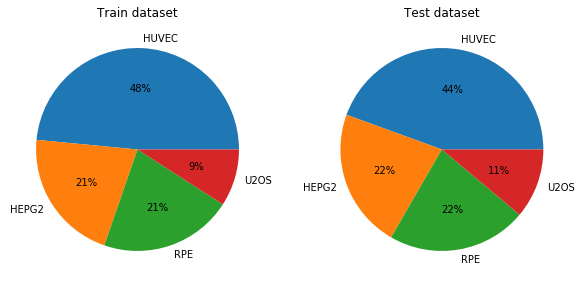

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].title.set_text('Train dataset')
ax[0].pie([float(train_exp_counter[e]) for e in exp], 
        labels=exp, 
        autopct='%1.0f%%');

ax[1].title.set_text('Test dataset')
ax[1].pie([float(test_exp_counter[e]) for e in exp], 
        labels=exp, 
        autopct='%1.0f%%');

Use the last two experiment for ('HUVEC', 16), ('RPE', 7), ('HEPG2', 7) and the last from ('U2OS', 3) as validation set.

In [83]:
# look at the train directories
!ls  train

HEPG2-01  HEPG2-06     HUVEC-03  HUVEC-08  HUVEC-13  RPE-01  RPE-06
HEPG2-02  HEPG2-07     HUVEC-04  HUVEC-09  HUVEC-14  RPE-02  RPE-07
HEPG2-03  history.csv  HUVEC-05  HUVEC-10  HUVEC-15  RPE-03  U2OS-01
HEPG2-04  HUVEC-01     HUVEC-06  HUVEC-11  HUVEC-16  RPE-04  U2OS-02
HEPG2-05  HUVEC-02     HUVEC-07  HUVEC-12  models    RPE-05  U2OS-03


In [84]:
# show experiment count per cell line
train_exp_counter.most_common()

[('HUVEC', 16), ('RPE', 7), ('HEPG2', 7), ('U2OS', 3)]

In [3]:
valid_exp_split = ['HUVEC-15', 'HUVEC-16',
                   'RPE-06', 'RPE-07', 
                   'HEPG2-06', 'HEPG2-07', 
                   'U2OS-03']

# v1

## full_train_dataset_valid-split-ex_v1_20190714.csv

In [149]:
df_train = pd.read_csv('train.csv')

In [150]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [151]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype=object), 33)

In [152]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 
               'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 
               'HUVEC-15', 'HUVEC-16', 
               'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07',
               'U2OS-01', 'U2OS-02', 'U2OS-03'
              ]

In [153]:
# setup empty df
df = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [154]:
df['experiment'] = df_train['experiment']

In [155]:
df['sirna'] = df_train['sirna']

In [156]:
df['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [157]:
df.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [158]:
# filter for experiments
df = df[df['experiment'].isin(experiments)]

In [159]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [160]:
df.tail()

,path,experiment,sirna,multi
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509


In [161]:
df['valid'] = 0

In [162]:
for c in valid_exp_split:
    df.loc[df['experiment'] == c,'valid'] = 1

In [163]:
df.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [164]:
df.valid.mean()

0.21191291250171163

In [165]:
df.tail()

,path,experiment,sirna,multi,valid
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103,1
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202,1
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824,1
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328,1
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509,1


In [166]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [173]:
df.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()

7738

In [175]:
df.shape[0]

36515

In [176]:
df.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()/df.shape[0]

0.21191291250171163

In [167]:
df.to_csv('full_train_dataset_valid-split-ex_v1_20190714.csv')

## full_test_dataset_v1_20190714.csv

In [179]:
df_test = pd.read_csv('test.csv')

In [180]:
df_test.head()

,id_code,experiment,plate,well
0,HEPG2-08_1_B03,HEPG2-08,1,B03
1,HEPG2-08_1_B04,HEPG2-08,1,B04
2,HEPG2-08_1_B05,HEPG2-08,1,B05
3,HEPG2-08_1_B06,HEPG2-08,1,B06
4,HEPG2-08_1_B07,HEPG2-08,1,B07


In [181]:
df_test.experiment.unique(), len(df_test.experiment.unique())

(array(['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17',
        'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21', 'HUVEC-22',
        'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11',
        'U2OS-04', 'U2OS-05'], dtype=object), 18)

In [182]:
experiments = ['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17', 'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21',
        'HUVEC-22', 'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11', 'U2OS-04', 'U2OS-05']

In [183]:
# setup empty df
df = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df['path'] = df_test['experiment']+'/Plate'+df_test['plate'].apply(str)+'/'+df_test['well']+'_s1' #+'_w'


In [184]:
df['experiment'] = df_test['experiment']

In [185]:
df.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s1,HEPG2-08
1,HEPG2-08/Plate1/B04_s1,HEPG2-08
2,HEPG2-08/Plate1/B05_s1,HEPG2-08
3,HEPG2-08/Plate1/B06_s1,HEPG2-08
4,HEPG2-08/Plate1/B07_s1,HEPG2-08


In [186]:
# filter for experiments
df = df[df['experiment'].isin(experiments)]

In [187]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1107,
 1108,
 1108,
 1106,
 1108,
 1107,
 1108,
 1108,
 1108,
 1108,
 1099,
 1100,
 1108,
 1107,
 1108,
 1094,
 1108,
 1097]

In [188]:
df.tail()

,path,experiment
19892,U2OS-05/Plate4/O19_s1,U2OS-05
19893,U2OS-05/Plate4/O20_s1,U2OS-05
19894,U2OS-05/Plate4/O21_s1,U2OS-05
19895,U2OS-05/Plate4/O22_s1,U2OS-05
19896,U2OS-05/Plate4/O23_s1,U2OS-05


In [189]:
df.shape[0]

19897

In [148]:
df.to_csv('full_test_dataset_v1_20190714.csv')

# v2

## full_train_dataset_valid-split-ex_v2_20190727.csv

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [6]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype=object), 33)

In [7]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 
               'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 
               'HUVEC-15', 'HUVEC-16', 
               'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07',
               'U2OS-01', 'U2OS-02', 'U2OS-03'
              ]

In [8]:
# setup empty df
df1 = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df1['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [9]:
df1['experiment'] = df_train['experiment']

In [10]:
df1['sirna'] = df_train['sirna']

In [11]:
df1['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [12]:
df1.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [13]:
# filter for experiments
df1 = df1[df1['experiment'].isin(experiments)]

In [14]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [15]:
df1.tail()

,path,experiment,sirna,multi
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509


In [16]:
df1['valid'] = 0

In [17]:
for c in valid_exp_split:
    df1.loc[df1['experiment'] == c,'valid'] = 1

In [18]:
df1.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [19]:
df1.valid.mean()

0.21191291250171163

In [20]:
df1.tail()

,path,experiment,sirna,multi,valid
36510,U2OS-03/Plate4/O19_s1,U2OS-03,103,U2OS-03 103,1
36511,U2OS-03/Plate4/O20_s1,U2OS-03,202,U2OS-03 202,1
36512,U2OS-03/Plate4/O21_s1,U2OS-03,824,U2OS-03 824,1
36513,U2OS-03/Plate4/O22_s1,U2OS-03,328,U2OS-03 328,1
36514,U2OS-03/Plate4/O23_s1,U2OS-03,509,U2OS-03 509,1


In [21]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1106,
 1106,
 1108,
 1108,
 1108,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108,
 1108,
 1107,
 1107,
 1108,
 1108,
 1108,
 1108,
 1108,
 1102,
 1090,
 1094,
 1108,
 1108,
 1108,
 1108,
 1107,
 1108,
 1106,
 1108,
 1108,
 1108,
 1108]

In [22]:
df1.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [23]:
# copy dataframe to get rows for site 2
df2 = df1.copy()

In [24]:
# replace site 1 with site 2
df2['path'] = df2['path'].apply(lambda x: x[:-1]+'2')

In [25]:
df2.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s2,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s2,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s2,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s2,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s2,HEPG2-01,144,HEPG2-01 144,0


In [27]:
df_full = pd.concat((df1, df2))

In [28]:
df1.shape, df2.shape, df_full.shape

((36515, 5), (36515, 5), (73030, 5))

In [29]:
df_full.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()

15476

In [30]:
df_full.shape[0]

73030

In [32]:
df_full.pivot_table(values='valid', index='experiment', aggfunc='sum')['valid'].sum()/df_full.shape[0]

0.21191291250171163

In [33]:
df_full.to_csv('full_train_dataset_valid-split-ex_v2_20190727.csv')

## full_test_dataset_v2_20190727.csv

In [34]:
df_test = pd.read_csv('test.csv')

In [35]:
df_test.head()

,id_code,experiment,plate,well
0,HEPG2-08_1_B03,HEPG2-08,1,B03
1,HEPG2-08_1_B04,HEPG2-08,1,B04
2,HEPG2-08_1_B05,HEPG2-08,1,B05
3,HEPG2-08_1_B06,HEPG2-08,1,B06
4,HEPG2-08_1_B07,HEPG2-08,1,B07


In [36]:
df_test.experiment.unique(), len(df_test.experiment.unique())

(array(['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17',
        'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21', 'HUVEC-22',
        'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11',
        'U2OS-04', 'U2OS-05'], dtype=object), 18)

In [37]:
experiments = ['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17', 'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21',
        'HUVEC-22', 'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11', 'U2OS-04', 'U2OS-05']

In [38]:
# setup empty df
df1 = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df1['path'] = df_test['experiment']+'/Plate'+df_test['plate'].apply(str)+'/'+df_test['well']+'_s1' #+'_w'


In [39]:
df1['experiment'] = df_test['experiment']

In [40]:
df1.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s1,HEPG2-08
1,HEPG2-08/Plate1/B04_s1,HEPG2-08
2,HEPG2-08/Plate1/B05_s1,HEPG2-08
3,HEPG2-08/Plate1/B06_s1,HEPG2-08
4,HEPG2-08/Plate1/B07_s1,HEPG2-08


In [41]:
# filter for experiments
df1 = df1[df1['experiment'].isin(experiments)]

In [42]:
# get rows/images per experiment
[len(df1[df1['experiment'] == x]) for x in experiments]

[1107,
 1108,
 1108,
 1106,
 1108,
 1107,
 1108,
 1108,
 1108,
 1108,
 1099,
 1100,
 1108,
 1107,
 1108,
 1094,
 1108,
 1097]

In [43]:
df1.tail()

,path,experiment
19892,U2OS-05/Plate4/O19_s1,U2OS-05
19893,U2OS-05/Plate4/O20_s1,U2OS-05
19894,U2OS-05/Plate4/O21_s1,U2OS-05
19895,U2OS-05/Plate4/O22_s1,U2OS-05
19896,U2OS-05/Plate4/O23_s1,U2OS-05


In [44]:
# copy dataframe to get rows for site 2
df2 = df1.copy()

In [45]:
# replace site 1 with site 2
df2['path'] = df2['path'].apply(lambda x: x[:-1]+'2')

In [47]:
df2.head()

,path,experiment
0,HEPG2-08/Plate1/B03_s2,HEPG2-08
1,HEPG2-08/Plate1/B04_s2,HEPG2-08
2,HEPG2-08/Plate1/B05_s2,HEPG2-08
3,HEPG2-08/Plate1/B06_s2,HEPG2-08
4,HEPG2-08/Plate1/B07_s2,HEPG2-08


In [48]:
df_full = pd.concat((df1, df2))

In [49]:
df1.shape, df2.shape, df_full.shape

((19897, 2), (19897, 2), (39794, 2))

In [50]:
df_full.shape[0]

39794

In [51]:
df_full.to_csv('full_test_dataset_v2_20190727.csv')

# Old

See notebook "rcic_multicat_v6_resnet18u34_baseline_adversarial_full.ipynb" section 3.3.1 and 3.3.2.

## Adversarial test dataset setup

In [61]:
df_train = pd.read_csv('train.csv')

In [62]:
df_train.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [63]:
df_train.experiment.unique(), len(df_train.experiment.unique())

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02',
        'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11',
        'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05',
        'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02', 'U2OS-03'], dtype=object),
 33)

In [64]:
experiments = ['HEPG2-01', 'HEPG2-02', 'HEPG2-03', # train
               'HUVEC-01', 'HUVEC-02', 'HUVEC-03', # train
               'RPE-01' #valid
              ]

In [65]:
# setup empty df
df = pd.DataFrame()
# generate path without channel and image file suffix for open image function
df['path'] = df_train['experiment']+'/Plate'+df_train['plate'].apply(str)+'/'+df_train['well']+'_s1' #+'_w'


In [66]:
df['experiment'] = df_train['experiment']

In [67]:
df['sirna'] = df_train['sirna']

In [68]:
df['multi'] = df_train['experiment'].apply(lambda x: x.split('/')[0])+' '+df_train['sirna'].apply(lambda x: str(x))


In [69]:
df.head()

,path,experiment,sirna,multi
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144


In [70]:
# filter for experiments
df = df[df['experiment'].isin(experiments)]

In [71]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106, 1106, 1108, 1108, 1108, 1108, 1108]

In [72]:
df.tail()

,path,experiment,sirna,multi
26541,RPE-01/Plate4/O19_s1,RPE-01,832,RPE-01 832
26542,RPE-01/Plate4/O20_s1,RPE-01,773,RPE-01 773
26543,RPE-01/Plate4/O21_s1,RPE-01,200,RPE-01 200
26544,RPE-01/Plate4/O22_s1,RPE-01,725,RPE-01 725
26545,RPE-01/Plate4/O23_s1,RPE-01,318,RPE-01 318


In [73]:
df['valid'] = 0

In [74]:
# set valid dataset
df.loc[df['experiment'] == 'RPE-01','valid'] = 1

In [75]:
df.head()

,path,experiment,sirna,multi,valid
0,HEPG2-01/Plate1/B03_s1,HEPG2-01,513,HEPG2-01 513,0
1,HEPG2-01/Plate1/B04_s1,HEPG2-01,840,HEPG2-01 840,0
2,HEPG2-01/Plate1/B05_s1,HEPG2-01,1020,HEPG2-01 1020,0
3,HEPG2-01/Plate1/B06_s1,HEPG2-01,254,HEPG2-01 254,0
4,HEPG2-01/Plate1/B07_s1,HEPG2-01,144,HEPG2-01 144,0


In [76]:
df.tail()

,path,experiment,sirna,multi,valid
26541,RPE-01/Plate4/O19_s1,RPE-01,832,RPE-01 832,1
26542,RPE-01/Plate4/O20_s1,RPE-01,773,RPE-01 773,1
26543,RPE-01/Plate4/O21_s1,RPE-01,200,RPE-01 200,1
26544,RPE-01/Plate4/O22_s1,RPE-01,725,RPE-01 725,1
26545,RPE-01/Plate4/O23_s1,RPE-01,318,RPE-01 318,1


In [77]:
# get rows/images per experiment
[len(df[df['experiment'] == x]) for x in experiments]

[1106, 1106, 1108, 1108, 1108, 1108, 1108]

In [78]:
df.to_csv('df_adversarial_test_dataset.csv')